importing required libs

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
data = pd.read_csv("Q:/Datasets/500_Person_Gender_Height_Weight_Index.csv")

In [7]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [8]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [9]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [10]:
data.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [14]:
#imporing machine learning libs
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [17]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [18]:
data

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [19]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [21]:
bins = (-1,0,1,2,3,4,5)
health = ['malnourished', 'underweight', 'fit', 'slightly_overweight', 'overweight', 'extremly_overweight']
data['Index'] = pd.cut(data['Index'], bins = bins, labels=health)

In [22]:
data['Index']

0               overweight
1                      fit
2               overweight
3      slightly_overweight
4      slightly_overweight
              ...         
495    extremly_overweight
496             overweight
497    extremly_overweight
498    extremly_overweight
499    extremly_overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): [malnourished < underweight < fit < slightly_overweight < overweight < extremly_overweight]

In [23]:
data['Index'].value_counts()

extremly_overweight    198
overweight             130
fit                     69
slightly_overweight     68
underweight             22
malnourished            13
Name: Index, dtype: int64

In [24]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

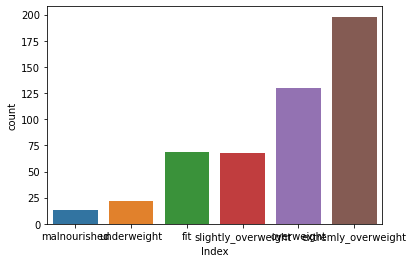

In [25]:
sns.countplot(data['Index'])

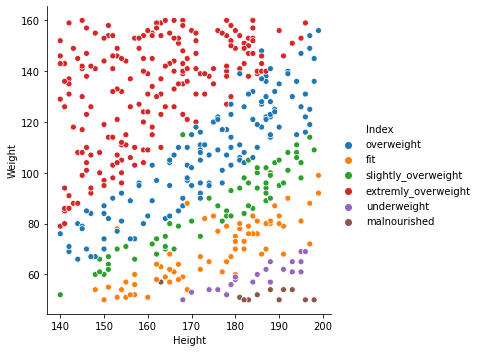

In [26]:
sns.relplot(x='Height', y='Weight', hue="Index", data=data)

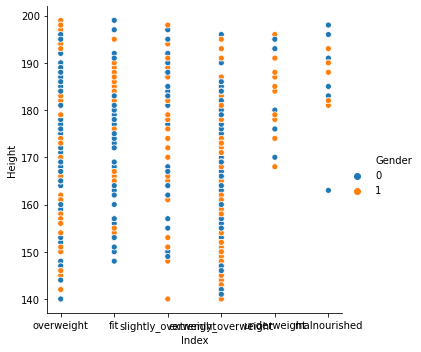

In [27]:
sns.relplot(x='Index', y="Height", hue="Gender", data =data)

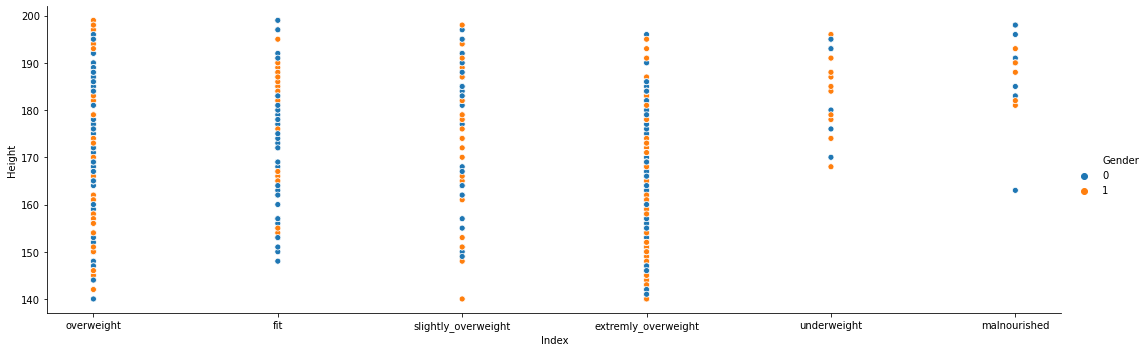

In [28]:
sns.relplot(x='Index', y="Height", hue="Gender", data =data, height=5, aspect=3)

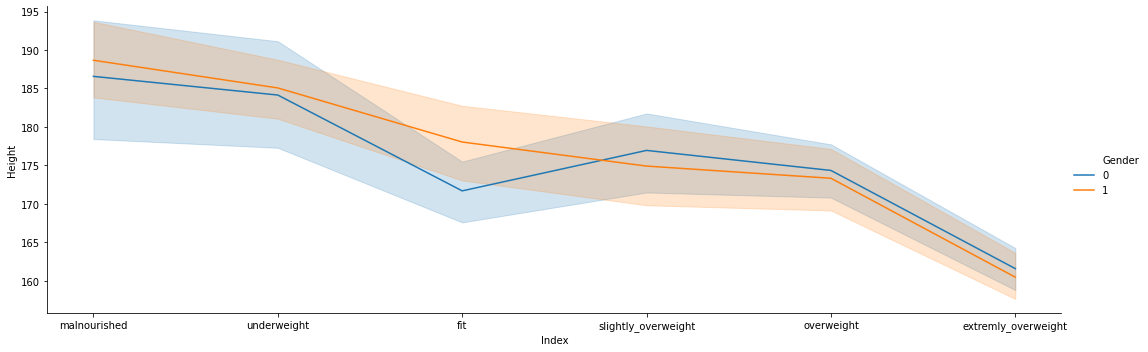

In [29]:
sns.relplot(x='Index', y="Height", hue="Gender", kind='line', data =data, height=5, aspect=3)

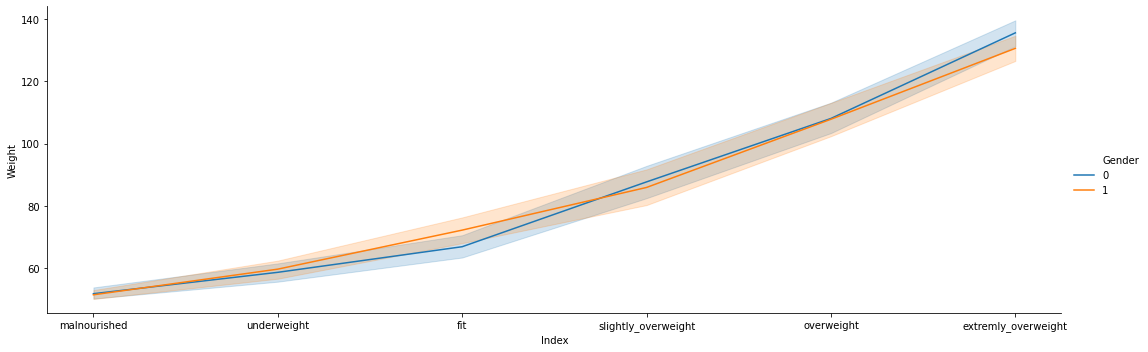

In [30]:
sns.relplot(x='Index', y="Weight", hue="Gender", kind='line', data =data, height=5, aspect=3)

In [31]:
x = data.drop('Index', axis=1)
y = data['Index']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [35]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [37]:
clf = svm.SVC()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

In [38]:
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

extremly_overweight       0.88      0.97      0.92        36
                fit       0.73      0.80      0.76        10
       malnourished       0.00      0.00      0.00         3
         overweight       0.96      0.78      0.86        32
slightly_overweight       0.78      0.93      0.85        15
        underweight       0.60      0.75      0.67         4

           accuracy                           0.85       100
          macro avg       0.66      0.71      0.68       100
       weighted avg       0.84      0.85      0.84       100



C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(confusion_matrix(y_test,pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [40]:
print(accuracy_score(y_test,pred))

0.85


In [43]:
a = [[0,160,48]]
a = s.transform(a)
b = clf.predict(a)

In [44]:
b

array(['fit'], dtype=object)

In [45]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly_overweight
4,1,149,61,slightly_overweight
...,...,...,...,...
495,0,150,153,extremly_overweight
496,0,184,121,overweight
497,0,141,136,extremly_overweight
498,1,150,95,extremly_overweight


In [48]:
a = [[0,185,90]]
a = s.transform(a)
b = clf.predict(a)

In [49]:
b

array(['slightly_overweight'], dtype=object)

In [50]:
a = [[0,185,110]]
a = s.transform(a)
b = clf.predict(a)

In [51]:
b

array(['overweight'], dtype=object)